## Predicting Gender from Height and Weight data of celebrities
## k-means-clustering-using-sklearn-cluster

** k-means-clustering-using-sklearn-cluster

** This program guesses whether someone is a boy or a girl based on their height and weight/

** I got the idea from just browsing the internet trying to think of some kind of data (maybe to do with attractiveness ? but then thinking I didn't want to overcomplicate my first solution to a probelm

** I got celebrity height and weight data from http://www.celeb-height-weight.psyphil.com/ (using scraping)

** I learnt that maybe nearest neighbough or kmeans clustering might work best

** after some googling I found an example using a dataset that also had two features (columns)

https://stackoverflow.com/questions/34113790/k-means-clustering-using-sklearn-cluster

In [1]:
import numpy as np
import sklearn
import tensorflow
import pandas
import matplotlib.pyplot as plt

In [3]:
import numpy
from urllib.request import urlopen
html = urlopen("http://www.celeb-height-weight.psyphil.com/")
print(html)

page = html.read()



from bs4 import BeautifulSoup


soup = BeautifulSoup(page)



/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [12]:
import numpy as np

data   = []
labels = []
count = 0

for tr in soup.find_all('tr')[1:]:
    tds = tr.find_all('td')
    #print(tds[0].text)
    labels.append([tds[0].text.strip('\n')])
    #labels.append("foo")    
    
    
    if "lbs" in tds[2].text:
        if "died" in tds[2].text:
            #print(tds[2].text.strip(' lbs (when died)'))
            weight = tds[2].text.strip(' lbs (when died)')
            weight = float(weight)
            #print(weight)
            #raise ValueError('A very specific bad thing happened')
        else:
            weight = numpy.array(tds[2].text.strip(' lbs').split("-"))
            averageWeight = numpy.mean(weight.astype(np.float))
            weight = averageWeight
    
    # Convert weight from lb into kg
    weightKg = float(weight) * 0.453592
    
    #get Height CM
    height = float(tds[1].text.split(' cms')[0].split('/')[1])
    #print(height)
    
    person = [height,  weightKg, str(tds[0].text.split('\n')[1])]
    data.append(person)

    count = count + 1

data.append([158,64, 'Marta Formenton'])
data.append([176,71.6, 'Vince Lynch'])



In [13]:
print(data)

[[177.8, 52.49873808, 'Adriana Lima'], [167.64, 54.4990788, 'Alicia Keys'], [170.18, 77.50072912, 'Al Pacino'], [173.99, 47.50015424, 'Amber Valletta'], [172.72, 55.49924916, 'Angelina Jolie'], [172.72, 54.4990788, 'Anna Kournikova'], [170.18, 56.499419520000004, 'Ashley Judd'], [157.48, 51.500835679999994, 'Avril Lavigne'], [174.0, 58.49976024, 'Bar Rafaeli'], [168.91, 77.50072912, 'Ben Stiller'], [167.64, 59.499930600000006, 'Beyonce Knowles'], [172.72, 56.499419520000004, 'Blake Lively'], [180.34, 90.50067583999999, 'Brad Pitt'], [162.56, 49.50049496, 'Britney Spears'], [181.61, 94.50135728, 'Bruce Willis'], [167.64, 44.49964316, 'Calista Flockhart'], [173.99, 54.4990788, 'Cameron Diaz'], [179.07, 51.500835679999994, 'Carmen Kass'], [160.02, 51.500835679999994, 'Carmen Electra'], [160.02, 51.500835679999994, 'Carrie Underwood'], [173.99, 54.4990788, 'Cate Blanchett'], [172.72, 58.49976024, 'Catherine Zeta Jones'], [176.53, 59.499930600000006, 'Charlize Theron'], [182.88, 86.49999439

In [14]:
data = numpy.array(data)
print(data)


[['177.8' '52.49873808' 'Adriana Lima']
 ['167.64' '54.4990788' 'Alicia Keys']
 ['170.18' '77.50072912' 'Al Pacino']
 ['173.99' '47.50015424' 'Amber Valletta']
 ['172.72' '55.49924916' 'Angelina Jolie']
 ['172.72' '54.4990788' 'Anna Kournikova']
 ['170.18' '56.499419520000004' 'Ashley Judd']
 ['157.48' '51.500835679999994' 'Avril Lavigne']
 ['174.0' '58.49976024' 'Bar Rafaeli']
 ['168.91' '77.50072912' 'Ben Stiller']
 ['167.64' '59.499930600000006' 'Beyonce Knowles']
 ['172.72' '56.499419520000004' 'Blake Lively']
 ['180.34' '90.50067583999999' 'Brad Pitt']
 ['162.56' '49.50049496' 'Britney Spears']
 ['181.61' '94.50135728' 'Bruce Willis']
 ['167.64' '44.49964316' 'Calista Flockhart']
 ['173.99' '54.4990788' 'Cameron Diaz']
 ['179.07' '51.500835679999994' 'Carmen Kass']
 ['160.02' '51.500835679999994' 'Carmen Electra']
 ['160.02' '51.500835679999994' 'Carrie Underwood']
 ['173.99' '54.4990788' 'Cate Blanchett']
 ['172.72' '58.49976024' 'Catherine Zeta Jones']
 ['176.53' '59.49993060000

In [15]:
"""EXPORT THE DATA TO CSV INCASE THE WEBSITE WE SCRAPPED IT FROM GOES OFFLINE"""
import numpy as np
np.savetxt('height-weights.csv', data, delimiter=',')

TypeError: Mismatch between array dtype ('<U32') and format specifier ('%.18e,%.18e,%.18e')

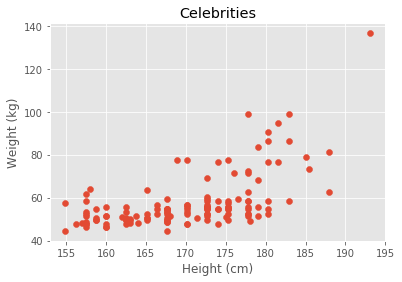

In [16]:
x  = data[:,0]
y = data[:,1]
#print(y)

plt.title('Celebrities')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.scatter(x, y)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.cluster import KMeans

nData = data[:,:2]
#np.append(nData, [158,64])

newArr = nData

print(newArr)

[['177.8' '52.49873808']
 ['167.64' '54.4990788']
 ['170.18' '77.50072912']
 ['173.99' '47.50015424']
 ['172.72' '55.49924916']
 ['172.72' '54.4990788']
 ['170.18' '56.499419520000004']
 ['157.48' '51.500835679999994']
 ['174.0' '58.49976024']
 ['168.91' '77.50072912']
 ['167.64' '59.499930600000006']
 ['172.72' '56.499419520000004']
 ['180.34' '90.50067583999999']
 ['162.56' '49.50049496']
 ['181.61' '94.50135728']
 ['167.64' '44.49964316']
 ['173.99' '54.4990788']
 ['179.07' '51.500835679999994']
 ['160.02' '51.500835679999994']
 ['160.02' '51.500835679999994']
 ['173.99' '54.4990788']
 ['172.72' '58.49976024']
 ['176.53' '59.499930600000006']
 ['182.88' '86.49999439999999']
 ['156.21' '47.50015424']
 ['177.8' '52.49873808']
 ['172.72' '60.50010096']
 ['177.8' '54.4990788']
 ['170.18' '54.4990788']
 ['167.64' '50.49839736']
 ['175.26' '58.49976024']
 ['166.37' '54.4990788']
 ['179.07' '83.49948332']
 ['167.64' '54.4990788']
 ['162.56' '55.49924916']
 ['158.75' '50.49839736']
 ['182.8

[[ 179.91217391   82.02612004]
 [ 168.20072072   52.98447366]]
[1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0]
coordinate: ['177.8' '52.49873808'] label: 1
coordinate: ['167.64' '54.4990788'] label: 1
coordinate: ['170.18' '77.50072912'] label: 0
coordinate: ['173.99' '47.50015424'] label: 1
coordinate: ['172.72' '55.49924916'] label: 1
coordinate: ['172.72' '54.4990788'] label: 1
coordinate: ['170.18' '56.499419520000004'] label: 1
coordinate: ['157.48' '51.500835679999994'] label: 1
coordinate: ['174.0' '58.49976024'] label: 1
coordinate: ['168.91' '77.50072912'] label: 0
coordinate: ['167.64' '59.499930600000006'] label: 1
coordinate: ['172.72' '56.499419520000004'] label: 1
coordinate: ['180.34' '90.50067583999999'] label: 0
coordinate: ['162.56' '49.50049496']

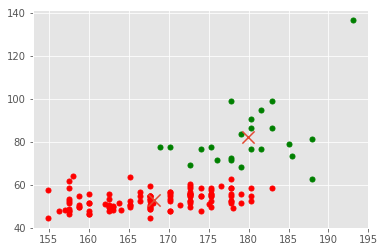

In [18]:

X = newArr

#X.reshape(-1, 1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)

colors = ["g.","r."]

for i in range(len(X)):
   print ("coordinate:" , X[i], "label:", labels[i])
   plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)

plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)

plt.show()

In [19]:
import pandas as pd

df = pd.DataFrame(data)
# add the labels column [boy/girl]
#print(df)
df[3] = labels
#df[3].replace(['girl', 'boy'], [1,0]) 
df[3].replace({0: 'Boy', 1: 'Girl'}, inplace=True)
print(df)

          0                   1                      2     3
0     177.8         52.49873808           Adriana Lima  Girl
1    167.64          54.4990788            Alicia Keys  Girl
2    170.18         77.50072912              Al Pacino   Boy
3    173.99         47.50015424         Amber Valletta  Girl
4    172.72         55.49924916         Angelina Jolie  Girl
5    172.72          54.4990788        Anna Kournikova  Girl
6    170.18  56.499419520000004            Ashley Judd  Girl
7    157.48  51.500835679999994          Avril Lavigne  Girl
8     174.0         58.49976024            Bar Rafaeli  Girl
9    168.91         77.50072912            Ben Stiller   Boy
10   167.64  59.499930600000006        Beyonce Knowles  Girl
11   172.72  56.499419520000004           Blake Lively  Girl
12   180.34   90.50067583999999              Brad Pitt   Boy
13   162.56         49.50049496         Britney Spears  Girl
14   181.61         94.50135728           Bruce Willis   Boy
15   167.64         44.4